In [125]:
# Particle swarm optimization for f(x) = sin(x)+sin((10/3)*x) in [-10, 10]

In [126]:
particles_count = 9 
iterasyon = 10

In [127]:
def func(x):    
    return math.sin(x) + math.sin((10/3)*x)

In [128]:
def create_particle():
    sayı = (rnd.random() * 20) - 10
    return sayı

def create_initial_particles():
    return [create_particle() for x in range(particles_count)]

In [129]:
def cal_fitness_max(particle_locs):
    temp_fitness = [0 for x in range(particles_count)]
    for i in range(particles_count):
        temp_fitness[i] = func(particle_locs[i])   
    return temp_fitness

def cal_fitness_min(particle_locs):
    temp_fitness = [0 for x in range(particles_count)]
    for i in range(particles_count):
        temp_fitness[i] = -func(particle_locs[i])   
    return temp_fitness

In [130]:
def cal_velocity(particle_loc, velocities, personal_best_loc, global_best_loc):
    
    temp_velocities = [0 for x in range(particles_count)]
    r1 = rnd.uniform(0, 1)
    r2 = rnd.uniform(0, 1)
    
    for i in range(particles_count):
        temp_velocities[i] = 1*velocities[i] + 1*r1*(personal_best_loc[i] - particle_loc[i]) + 1*r2*(global_best_loc - particle_loc[i])
    
    return temp_velocities

In [135]:
def clip_for_pso(x):
    return max(min(x,10),-10)

In [136]:
def pso_main_process(repetition, calculate_fitness_type):
    history = []
    cal_fitness = calculate_fitness_type
    
    for i in range(repetition):
        particles_locs = create_initial_particles()

        velocities = [0 for x in range(particles_count)]
        fitness = []
        personal_best_loc = [0 for x in range(particles_count)]
        personal_best_fit = [-math.inf for x in range(particles_count)]

        epok = 0
        global_best_fit = -math.inf
        global_best_loc = 0
        
        while(epok < iterasyon):
            fitness = cal_fitness(particles_locs)

            for i in range(particles_count):
                if (personal_best_fit[i] < fitness[i]): 
                    personal_best_fit[i] = fitness[i]
                    personal_best_loc[i] = particles_locs[i]

            for i in range(particles_count):
                if (global_best_fit < fitness[i]): 
                    global_best_fit = fitness[i]
                    global_best_loc = particles_locs[i]
            
            history.append(global_best_fit)
            print("Global, fitness :", global_best_fit, "location :", global_best_loc)
            
            velocities = cal_velocity(particles_locs, velocities, personal_best_loc, global_best_loc)

            for i in range(particles_count):
                particles_locs[i] = clip_for_pso( particles_locs[i] + velocities[i] )

            epok +=1
        if (calculate_fitness_type == cal_fitness_max): print("The best solution (maximum) : ", global_best_loc)
        else: print("The best solution (minimum) : ", global_best_loc)
    return history

In [149]:
history_max_pso = pso_main_process(1, cal_fitness_max)
history_min_pso = pso_main_process(1, cal_fitness_min)

Global, fitness : 1.356003627983652 location : 0.7072032612474715
Global, fitness : 1.356003627983652 location : 0.7072032612474715
Global, fitness : 1.3645794692685367 location : 0.7017628047074636
Global, fitness : 1.7016491959831193 location : 7.774468405099758
Global, fitness : 1.7016491959831193 location : 7.774468405099758
Global, fitness : 1.7016491959831193 location : 7.774468405099758
Global, fitness : 1.7016491959831193 location : 7.774468405099758
Global, fitness : 1.962314723601494 location : 7.931851017781881
Global, fitness : 1.962314723601494 location : 7.931851017781881
Global, fitness : 1.962314723601494 location : 7.931851017781881
En iyi çözüm (maksimum):  7.931851017781881
Global, fitness : 1.437083869859593 location : -0.45415660552738046
Global, fitness : 1.437083869859593 location : -0.45415660552738046
Global, fitness : 1.4872233003277464 location : -0.5635431319902349
Global, fitness : 1.586281337199397 location : -2.4516590390505355
Global, fitness : 1.7260964

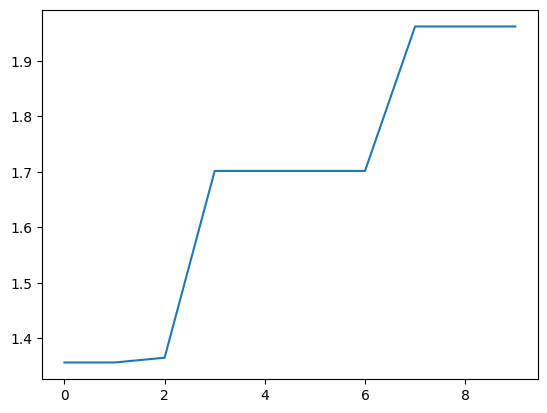

In [150]:
plt.plot(history_max_pso)
plt.show()

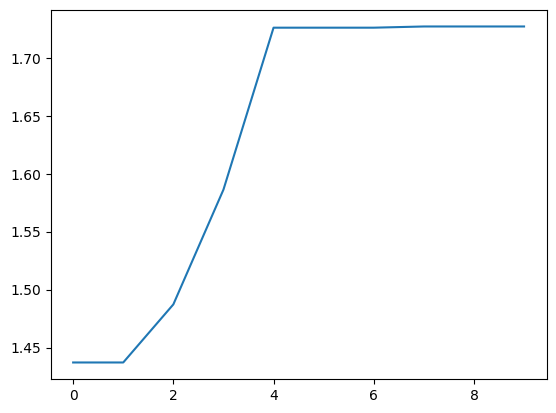

In [151]:
plt.plot(history_min_pso)
plt.show()